In [1]:
!cd

In [2]:
import pymysql.cursors
# Connect to the database
import pandas as pd

In [3]:
# localhost or 127.0.0.0

In [4]:
# connection = pymysql.connect(host='localhost',
#         user='yoohwayoung',
#         password='jslee818++',
#         db='tip',
#         charset='utf8',
#         cursorclass=pymysql.cursors.DictCursor)
# try:
#     with connection.cursor() as cursor:
#         # Read a single record
#         #sql = "SELECT count(total_bill) FROM tip.tips where tip >= 7;" 
#         #=> count를 하는 습관을 들여라! 몇개가 있는지 파악하고 해야지 메모리를 안잡아먹는다.
#         sql = "SELECT count(total_bill) FROM tip.tips where tip >= 7;"
#         cursor.execute(sql)
#         result = cursor.fetchone()
#         print(result)
# finally:
#     connection.close()

In [5]:
import pymysql.cursors
# Connect to the database
import pandas as pd

In [6]:
# MySQL DB에서 데이터 받아와서 DataFrame에 저장

conn = pymysql.connect(host='localhost',
        user='yoohwayoung',
        password='jslee818++',
        db='tip',
        charset='utf8',
        autocommit=True, cursorclass=pymysql.cursors.DictCursor)
try:

   with conn.cursor() as curs:
      sql = "SELECT * FROM tips; "
      curs.execute(sql)
      rs = curs.fetchall()

      # DB에서 받아온 값을 DataFrame에 넣음

      df = pd.DataFrame(rs)
      print(df)
   df.to_csv('query.csv')
    

    
finally:

   conn.close()

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
247        3.07  1.00    None    Yes   Sat    None     1
248        4.59  3.61    None     No  None  Dinner     4
249        4.36  2.61    None     No   Sat  Dinner     4
250        4.36  2.61    None     No   Sat  Dinner     4
251        2.36  3.00    None     No   Sat  Dinner     2

[252 rows x 7 columns]


In [7]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
247,3.07,1.00,None,Yes,Sat,None,1
248,4.59,3.61,None,No,None,Dinner,4
249,4.36,2.61,None,No,Sat,Dinner,4
250,4.36,2.61,None,No,Sat,Dinner,4


In [8]:
df['sex'].replace({'Female':0, 'Male':1}, inplace=True)#바이너리인코딩
df['smoker'].replace({'No':0, 'Yes':1}, inplace=True)#바이너리인코딩
df['time'].replace({'Lunch':0, 'Dinner':1}, inplace=True)#바이너리인코딩
df['day'].replace({'Thur':0, 'Fri':1, 'Sat':2, 'Sun':3}, inplace=True) #라벨인코딩

In [9]:
#df.replace('',np.nan,inplace=True)

In [10]:
#df=df.drop('day', axis=1)

In [11]:
df.isnull().sum()

total_bill    0
tip           0
sex           5
smoker        0
day           1
time          1
size          0
dtype: int64

In [12]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,252.000000,252.000000,247.000000,252.000000,251.000000,251.000000,252.000000
mean,19.268730,2.965913,0.635628,0.384921,1.733068,0.729084,2.559524
std,9.216139,1.385176,0.482231,0.487545,1.140378,0.445321,0.969879
min,2.360000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,17.465000,2.790000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,24.022500,3.520000,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [13]:
df.info() #모든 타입이 object가 아니어야함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  252 non-null    float64
 1   tip         252 non-null    float64
 2   sex         247 non-null    float64
 3   smoker      252 non-null    int64  
 4   day         251 non-null    float64
 5   time        251 non-null    float64
 6   size        252 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 13.9 KB


In [14]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0.0,0,3.0,1.0,2
1,10.34,1.66,1.0,0,3.0,1.0,3
2,21.01,3.50,1.0,0,3.0,1.0,3
3,23.68,3.31,1.0,0,3.0,1.0,2
4,24.59,3.61,0.0,0,3.0,1.0,4
...,...,...,...,...,...,...,...
247,3.07,1.00,NaN,1,2.0,NaN,1
248,4.59,3.61,NaN,0,NaN,1.0,4
249,4.36,2.61,NaN,0,2.0,1.0,4
250,4.36,2.61,NaN,0,2.0,1.0,4


In [15]:
type(df)

pandas.core.frame.DataFrame

In [16]:
import pandas as pd
import numpy as np
from numpy import isnan
from sklearn.impute import SimpleImputer

In [17]:
data = df.values

In [18]:
#sum(np.isnan(data).flatten)

In [19]:
data=df.values

In [20]:
y=df['total_bill'] #x,y를 갈라주는작업 => total_bill : 목표변수

In [21]:
X=df.drop('total_bill',axis=1) #total_bill은 목표변수니까

In [22]:
X.describe() #total_bill이 빠졌음!! 이 작업을 진행한 것임

,tip,sex,smoker,day,time,size
count,252.000000,247.000000,252.000000,251.000000,251.000000,252.000000
mean,2.965913,0.635628,0.384921,1.733068,0.729084,2.559524
std,1.385176,0.482231,0.487545,1.140378,0.445321,0.969879
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,2.790000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,3.520000,1.000000,1.000000,3.000000,1.000000,3.000000
max,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [23]:
y.describe()

count    252.000000
mean      19.268730
std        9.216139
min        2.360000
25%       13.000000
50%       17.465000
75%       24.022500
max       50.810000
Name: total_bill, dtype: float64

In [24]:
data=X.values

In [25]:
y=y.values

In [26]:
data[:,5]

array([2., 3., 3., 2., 4., 4., 2., 4., 2., 2., 2., 4., 2., 4., 2., 2., 3.,
       3., 3., 3., 2., 2., 2., 4., 2., 4., 2., 2., 2., 2., 2., 4., 2., 4.,
       2., 3., 3., 3., 3., 3., 3., 2., 2., 2., 4., 2., 2., 4., 3., 2., 2.,
       2., 4., 2., 4., 2., 4., 2., 2., 4., 2., 2., 2., 4., 3., 3., 2., 1.,
       2., 2., 2., 3., 2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 1., 2., 2.,
       4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 2., 2.,
       3., 2., 2., 2., 2., 2., 2., 2., 2., 1., 3., 2., 3., 2., 4., 2., 2.,
       4., 2., 2., 2., 2., 2., 6., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 6., 5., 6., 2., 2., 3., 2., 2., 2., 2., 2., 3.,
       4., 4., 5., 6., 4., 2., 4., 4., 2., 3., 2., 2., 3., 2., 4., 2., 2.,
       3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4., 2., 3., 4., 2., 5., 3.,
       5., 3., 3., 2., 2., 2., 2., 2., 2., 2., 4., 2., 2., 3., 2., 2., 2.,
       4., 3., 3., 4., 2., 2., 3., 4., 4., 2., 3., 2., 5., 2., 2., 4., 2.,
       2., 1., 3., 2., 2.

In [27]:
df.isnull().sum()

total_bill    0
tip           0
sex           5
smoker        0
day           1
time          1
size          0
dtype: int64

In [28]:
#sum(np.isnan(data).flatten)

In [29]:
imputer = SimpleImputer(strategy='median')

In [30]:
imputer.fit(data)

SimpleImputer(strategy='median')

In [31]:
# transform the dataset
data_trans = imputer.transform(data)

In [32]:
data_trans.shape

(252, 6)

In [33]:
y.shape

(252,)

In [34]:
#data_trans[:,5]

In [35]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR

In [36]:
estimator=SVR(kernel='linear')

In [37]:
# define RFE
rfe = RFE(estimator, n_features_to_select=4)

In [38]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [39]:
# fit RFE
rfe.fit(data_trans,y)
#rfe.fit(X, y)

RFE(estimator=SVR(kernel='linear'), n_features_to_select=4)

In [40]:
# summarize all features
for i in range(data_trans.shape[1]):
  print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=True, Rank: 1
Column: 1, Selected=False, Rank: 3
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=False, Rank: 2
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=True, Rank: 1


In [43]:
df_trans = pd.DataFrame(data_trans)

<AxesSubplot:>

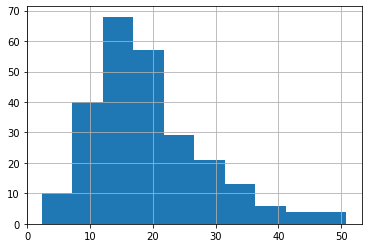

In [44]:
df['total_bill'].hist()

In [45]:
df_trans.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [46]:
df_trans

,0,1,2,3,4,5
0,1.01,0.0,0.0,3.0,1.0,2.0
1,1.66,1.0,0.0,3.0,1.0,3.0
2,3.50,1.0,0.0,3.0,1.0,3.0
3,3.31,1.0,0.0,3.0,1.0,2.0
4,3.61,0.0,0.0,3.0,1.0,4.0
...,...,...,...,...,...,...
247,1.00,1.0,1.0,2.0,1.0,1.0
248,3.61,1.0,0.0,2.0,1.0,4.0
249,2.61,1.0,0.0,2.0,1.0,4.0
250,2.61,1.0,0.0,2.0,1.0,4.0


## MinMaxScaler

In [47]:
# example of normalizing input data
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

In [48]:
trans=MinMaxScaler()

In [49]:
data.shape

(252, 6)

In [50]:
X_norm=trans.fit_transform(data)

In [51]:
df_norm=pd.DataFrame(X_norm)

In [52]:
df_norm.describe()

,0,1,2,3,4,5
count,252.000000,247.000000,252.000000,251.000000,251.000000,252.000000
mean,0.218435,0.635628,0.384921,0.577689,0.729084,0.311905
std,0.153908,0.482231,0.487545,0.380126,0.445321,0.193976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.333333,0.000000,0.200000
50%,0.198889,1.000000,0.000000,0.666667,1.000000,0.200000
75%,0.280000,1.000000,1.000000,1.000000,1.000000,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,252.000000,252.000000,247.000000,252.000000,251.000000,251.000000,252.000000
mean,19.268730,2.965913,0.635628,0.384921,1.733068,0.729084,2.559524
std,9.216139,1.385176,0.482231,0.487545,1.140378,0.445321,0.969879
min,2.360000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,17.465000,2.790000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,24.022500,3.520000,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


## StandardScaler

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
sc = StandardScaler()


In [56]:
df_sc = sc.fit_transform(data)

In [57]:
df_transform_sc=pd.DataFrame(df_sc)

In [58]:
df_transform_sc.describe().round() #평균이 0, 분산이 1로 바뀜

,0,1,2,3,4,5
count,252.0,247.0,252.0,251.0,251.0,252.0
mean,0.0,-0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0
50%,-0.0,1.0,-1.0,0.0,1.0,-1.0
75%,0.0,1.0,1.0,1.0,1.0,0.0
max,5.0,1.0,1.0,1.0,1.0,4.0


## PCA

PCA냉

In [59]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

In [60]:
data_trans.shape

(252, 6)

In [61]:
trans = PCA(n_components=4)

# transform the data
X_dim = trans.fit_transform(data_trans)

# summarize data after the transform
print(X_dim[:4, :])

[[-1.54819486 -1.78609191 -0.32798318 -0.31353071]
 [-0.49905308 -1.60976874 -0.93759479 -0.26879159]
 [ 1.05478294 -1.05690839 -0.12894498 -0.37036291]
 [ 0.45111605 -1.18140021  0.66465247 -0.53012383]]


## Regression Feature Selection:

In [62]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [63]:
fs = SelectKBest(score_func=f_regression, k=4)

In [65]:
# apply feature selection
X_selected = fs.fit_transform(data_trans, y)
print(X_selected.shape)

(252, 4)


In [66]:
#selector.support_ : 오류가 나긴 하지만... 어떤 변수를 선택했는지 알 수 있는 코드

NameError: name 'selector' is not defined

## 새출발

In [ ]:
import pymysql.cursors
# Connect to the database
import pandas as pd

In [ ]:
# sql = 'select customers.customerName, payments.checkNumber from customers\
# Left join payments on customers.customerNumber = payments.customerNumber\
# where payments.paymentDate >= "2004-10-06";'

In [ ]:
sql="select customers.state, \
customers.customerName, payments.checkNumber \
from customers \
LEFT JOIN payments on customers.customerNumber \
= payments.customerNumber where payments.paymentDate >= '2004-10-06';"

In [ ]:
conn = pymysql.connect(host='localhost',
        user='yoohwayoung',
        password='00000000',
        db='classicmodels',
        charset='utf8',
        autocommit=True, cursorclass=pymysql.cursors.DictCursor)
try:

   with conn.cursor() as curs:
      curs.execute(sql)
      rs = curs.fetchall()

      # DB에서 받아온 값을 DataFrame에 넣음

      df = pd.DataFrame(rs)
      print(df)

    #df.to_csv('query.csv')
    

    
finally:

   conn.close()